In [3]:
import requests
import time
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd


In [183]:
with open('API_key.txt') as f:
    api_key = f.read()

In [ ]:
API_KEY = api_key
BASE_URL = 'http://quickstats.nass.usda.gov/api/api_GET/'
OUTPUT_DIR = 'corn_yield_csv'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Select years for collection
START_YEAR = 1910
END_YEAR = 2024

for year in range(START_YEAR, END_YEAR + 1):
    params = {
        'key': API_KEY,
        'commodity_desc': 'CORN',
        'statisticcat_desc': 'YIELD',
        'unit_desc': 'BU / ACRE',
        'agg_level_desc': 'COUNTY',
        'year': year,
        'format': 'JSON'
    }

    try:
        print(f"Downloading data for year {year}...")
        response = requests.get(BASE_URL, params=params)
        response.raise_for_status()
        data = response.json()

        records = data.get('data', [])
        if not records:
            print(f"No data for {year}, next.")
            continue

        df = pd.DataFrame(records)

        # Salva CSV per l'anno
        csv_path = os.path.join(OUTPUT_DIR, f"corn_yield_{year}_county.csv")
        df.to_csv(csv_path, index=False)
        print(f"Saved {csv_path} with {len(df)} record.")
        time.sleep(3)  

    except requests.exceptions.RequestException as e:
        print(f"Error for year {year}: {e}")
        time.sleep(5)

In [ ]:
INPUT_DIR = 'corn_yield_csv'
OUTPUT_FILE = 'corn_yield_all_years_county.csv'

files = [os.path.join(INPUT_DIR, f) for f in os.listdir(INPUT_DIR) if f.endswith('.csv')]
dfs = []

for file in sorted(files):
    print(f"Loading {file}...")
    df = pd.read_csv(file)

    # clean the 'Value' column
    def clean_value(val):
        try:
            return float(str(val).replace(",", ""))
        except:
            return None
    df['Value'] = df['Value'].apply(clean_value)

    dfs.append(df)

if dfs:
    full_df = pd.concat(dfs, ignore_index=True)
    full_df.to_csv(OUTPUT_FILE, index=False)
    print(f"Dataset complete saved in '{OUTPUT_FILE}'.")
else:
    print("There are no files to assemble")

Loading corn_yield_csv\corn_yield_1910_county.csv...
Loading corn_yield_csv\corn_yield_1911_county.csv...
Loading corn_yield_csv\corn_yield_1912_county.csv...
Loading corn_yield_csv\corn_yield_1913_county.csv...
Loading corn_yield_csv\corn_yield_1914_county.csv...
Loading corn_yield_csv\corn_yield_1915_county.csv...
Loading corn_yield_csv\corn_yield_1916_county.csv...
Loading corn_yield_csv\corn_yield_1917_county.csv...
Loading corn_yield_csv\corn_yield_1918_county.csv...
Loading corn_yield_csv\corn_yield_1919_county.csv...
Loading corn_yield_csv\corn_yield_1920_county.csv...
Loading corn_yield_csv\corn_yield_1921_county.csv...
Loading corn_yield_csv\corn_yield_1922_county.csv...
Loading corn_yield_csv\corn_yield_1923_county.csv...
Loading corn_yield_csv\corn_yield_1924_county.csv...
Loading corn_yield_csv\corn_yield_1925_county.csv...
Loading corn_yield_csv\corn_yield_1926_county.csv...
Loading corn_yield_csv\corn_yield_1927_county.csv...
Loading corn_yield_csv\corn_yield_1928_county.

In [424]:
df = pd.read_csv('corn_yield_all_years_county.csv')

In [425]:
df.describe()

,region_desc,state_fips_code,country_code,state_ansi,week_ending,county_code,county_ansi,congr_district_code,end_code,begin_code,Value,watershed_desc,watershed_code,CV (%),year,zip_5,asd_code
count,0.00,"221,557.00","221,557.00","221,557.00",0.00,"221,557.00","213,879.00",0.00,"221,557.00","221,557.00","221,557.00",0.00,"221,557.00","7,506.00","221,557.00",0.00,"221,557.00"
mean,NaN,30.09,"9,000.00",30.09,NaN,124.45,93.09,NaN,0.00,0.00,81.04,NaN,0.00,5.56,"1,978.09",NaN,49.89
std,NaN,13.26,0.00,13.26,NaN,179.48,70.65,NaN,0.00,0.00,48.96,NaN,0.00,4.51,25.60,NaN,25.50
min,NaN,1.00,"9,000.00",1.00,NaN,1.00,1.00,NaN,0.00,0.00,0.00,NaN,0.00,0.50,"1,910.00",NaN,10.00
25%,NaN,20.00,"9,000.00",20.00,NaN,41.00,39.00,NaN,0.00,0.00,40.00,NaN,0.00,2.70,"1,960.00",NaN,30.00
50%,NaN,29.00,"9,000.00",29.00,NaN,87.00,83.00,NaN,0.00,0.00,73.60,NaN,0.00,4.10,"1,980.00",NaN,50.00
75%,NaN,39.00,"9,000.00",39.00,NaN,139.00,133.00,NaN,0.00,0.00,114.60,NaN,0.00,6.90,"1,998.00",NaN,70.00
max,NaN,56.00,"9,000.00",56.00,NaN,998.00,810.00,NaN,0.00,0.00,296.30,NaN,0.00,63.40,"2,024.00",NaN,99.00


In [426]:
df.columns

Index(['source_desc', 'region_desc', 'group_desc', 'agg_level_desc',
       'state_name', 'country_name', 'statisticcat_desc', 'domaincat_desc',
       'state_fips_code', 'country_code', 'sector_desc', 'state_ansi',
       'week_ending', 'county_code', 'prodn_practice_desc', 'county_ansi',
       'reference_period_desc', 'congr_district_code', 'unit_desc', 'end_code',
       'asd_desc', 'load_time', 'begin_code', 'Value', 'domain_desc',
       'util_practice_desc', 'watershed_desc', 'short_desc', 'watershed_code',
       'class_desc', 'commodity_desc', 'freq_desc', 'county_name', 'CV (%)',
       'state_alpha', 'location_desc', 'year', 'zip_5', 'asd_code'],
      dtype='object')

In [427]:
interest_columns = ['year','country_name','state_name','county_name','Value']

In [428]:
df = df.loc[:, interest_columns]

In [429]:
df.isna().sum()

year            0
country_name    0
state_name      0
county_name     0
Value           0
dtype: int64

In [432]:
df['state_name'].unique()

array(['NEBRASKA', 'OHIO', 'MISSOURI', 'NORTH DAKOTA', 'MINNESOTA',
       'SOUTH DAKOTA', 'ILLINOIS', 'NORTH CAROLINA', 'IOWA',
       'WEST VIRGINIA', 'DELAWARE', 'MARYLAND', 'WISCONSIN', 'INDIANA',
       'KENTUCKY', 'OKLAHOMA', 'ALABAMA', 'WASHINGTON', 'MICHIGAN',
       'MONTANA', 'SOUTH CAROLINA', 'MISSISSIPPI', 'NEW JERSEY',
       'GEORGIA', 'TENNESSEE', 'WYOMING', 'NEW MEXICO', 'OREGON',
       'KANSAS', 'VIRGINIA', 'CALIFORNIA', 'LOUISIANA', 'PENNSYLVANIA',
       'ARKANSAS', 'FLORIDA', 'COLORADO', 'ARIZONA', 'TEXAS', 'IDAHO',
       'NEW YORK', 'UTAH'], dtype=object)

In [661]:
# Aggregation for state and year
year_state_mean = df.groupby(['year', 'state_name'])['Value'].mean().reset_index()

In [662]:
# For national average
year_mean = df.groupby(['year'])['Value'].mean().reset_index()

In [663]:
state_year_range = year_state_mean.groupby('state_name')['year'].agg(['min', 'max'])
print(state_year_range)


                 min   max
state_name                
ALABAMA         1939  2024
ARIZONA         1965  2008
ARKANSAS        1961  2024
CALIFORNIA      1959  2023
COLORADO        1963  2024
DELAWARE        1928  2024
FLORIDA         1961  2009
GEORGIA         1954  2024
IDAHO           1972  2024
ILLINOIS        1925  2024
INDIANA         1929  2024
IOWA            1926  2024
KANSAS          1958  2024
KENTUCKY        1929  2024
LOUISIANA       1959  2024
MARYLAND        1928  2024
MICHIGAN        1942  2024
MINNESOTA       1921  2024
MISSISSIPPI     1953  2024
MISSOURI        1919  2024
MONTANA         1944  2016
NEBRASKA        1910  2024
NEW JERSEY      1953  2016
NEW MEXICO      1956  2016
NEW YORK        1972  2024
NORTH CAROLINA  1925  2024
NORTH DAKOTA    1919  2024
OHIO            1918  2024
OKLAHOMA        1933  2024
OREGON          1956  2009
PENNSYLVANIA    1960  2024
SOUTH CAROLINA  1944  2024
SOUTH DAKOTA    1924  2024
TENNESSEE       1955  2024
TEXAS           1968  2024
U

In [431]:
df.head()

,year,country_name,state_name,county_name,Value
0,1910,UNITED STATES,NEBRASKA,BANNER,14.40
1,1910,UNITED STATES,NEBRASKA,BOX BUTTE,16.00
2,1910,UNITED STATES,NEBRASKA,CHEYENNE,9.60
3,1910,UNITED STATES,NEBRASKA,DAWES,16.40
4,1910,UNITED STATES,NEBRASKA,DEUEL,17.50


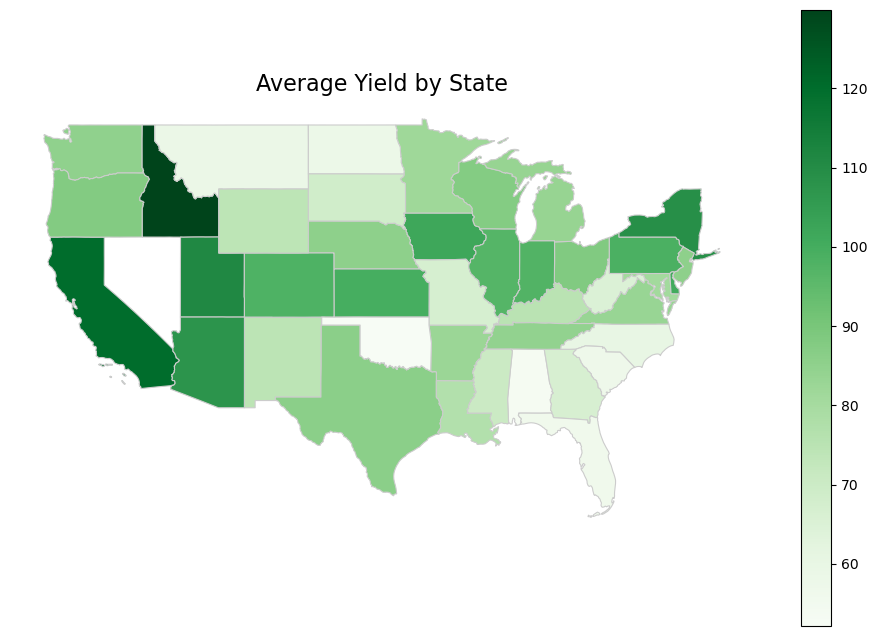

In [433]:
# Group by state to get average yield across all years
state_avg_yield = df.groupby('state_name')['Value'].mean().reset_index()

# Load US state shapefile (download from Census if needed)
states = gpd.read_file("cb_2018_us_state_20m.zip")

# Ensure consistent casing for merge
states['NAME'] = states['NAME'].str.upper()
state_avg_yield['state_name'] = state_avg_yield['state_name'].str.upper()

# Merge data
merged = states.merge(state_avg_yield, left_on='NAME', right_on='state_name')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column='Value', cmap='Greens', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)
ax.set_title('Average Yield by State', fontsize=16)
ax.axis('off')
plt.show()

In [434]:
df['Value'].describe()

count   221,557.00
mean         81.04
std          48.96
min           0.00
25%          40.00
50%          73.60
75%         114.60
max         296.30
Name: Value, dtype: float64

c:\ProgramData\anaconda3\envs\env_master\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  from_comp_data=True,


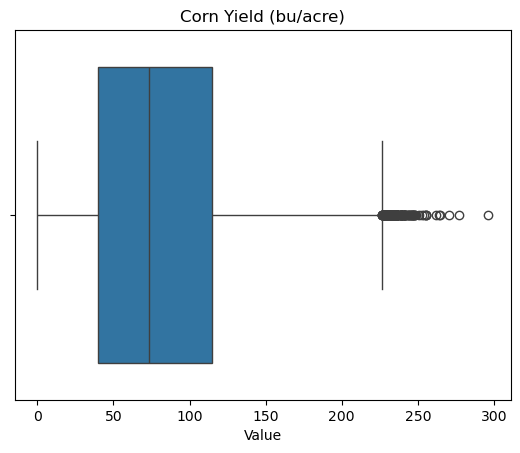

In [435]:
sns.boxplot(df['Value'], orient='h')
plt.title('Corn Yield (bu/acre)')
plt.show()

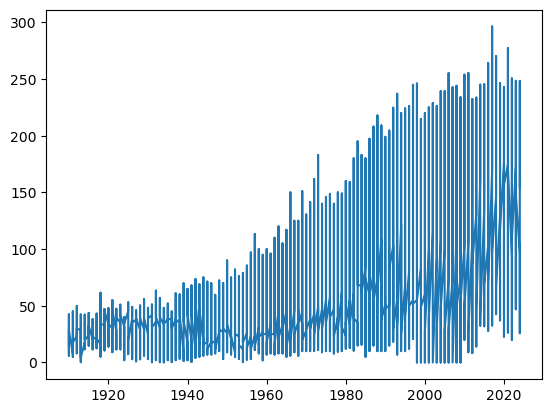

In [ ]:
plt.plot(df['year'], df['Value'])
plt.show()

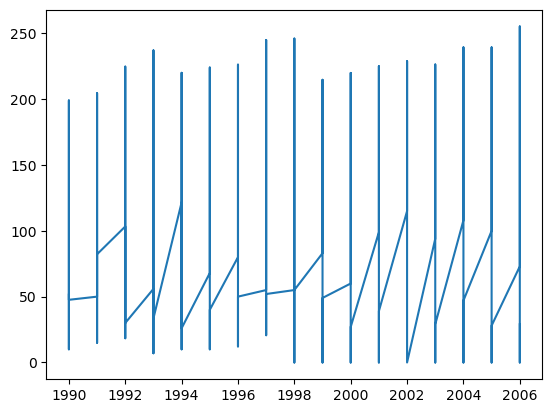

In [651]:
df_filtered = df[(df['year'] >= 1990) & (df['year'] <= 2006)]
plt.plot(df_filtered['year'], df_filtered['Value'])
plt.show()


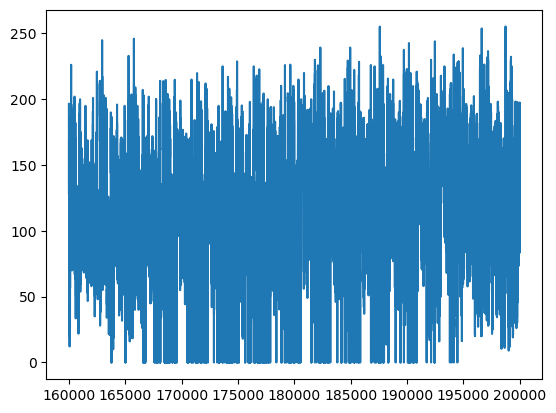

In [648]:
plt.plot(df['Value'].loc[160000:200000])
plt.show()

In [437]:
hist_wx_df = pd.read_parquet('hist_wx_df.parquet')

In [438]:
hist_wx_df.head()

,aoi_id,date,tmax,tmin,precip,swvl1,swvl2,adm2_name,adm1_name
0,USA.14.100_1,2000-01-01,9.15,-0.30,0.00,0.33,0.32,Will,Illinois
1,USA.14.100_1,2000-01-02,16.08,4.77,0.00,0.34,0.32,Will,Illinois
2,USA.14.100_1,2000-01-03,9.56,1.65,0.47,0.34,0.32,Will,Illinois
3,USA.14.100_1,2000-01-04,3.09,-3.19,1.18,0.38,0.34,Will,Illinois
4,USA.14.100_1,2000-01-05,-1.60,-8.90,0.00,0.35,0.34,Will,Illinois


In [439]:
hist_wx_df.describe().round(2)

,date,tmax,tmin,precip,swvl1,swvl2
count,8527402,"8,527,402.00","8,527,402.00","8,527,402.00","8,527,402.00","8,527,402.00"
mean,2012-03-02 03:27:13.931177984,16.46,6.88,2.36,0.32,0.32
min,2000-01-01 00:00:00,-32.29,-41.80,0.00,0.05,0.06
25%,2006-02-01 00:00:00,7.55,-1.34,0.00,0.27,0.26
50%,2012-03-03 00:00:00,17.97,7.70,0.00,0.34,0.33
75%,2018-04-02 00:00:00,26.25,16.38,1.50,0.38,0.38
max,2024-04-30 00:00:00,44.19,31.56,224.63,0.63,0.63
std,NaN,11.63,11.14,6.34,0.08,0.08


In [440]:
hist_wx_df.isnull().sum()

aoi_id       0
date         0
tmax         0
tmin         0
precip       0
swvl1        0
swvl2        0
adm2_name    0
adm1_name    0
dtype: int64

c:\ProgramData\anaconda3\envs\env_master\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  from_comp_data=True,


<Axes: xlabel='tmax'>

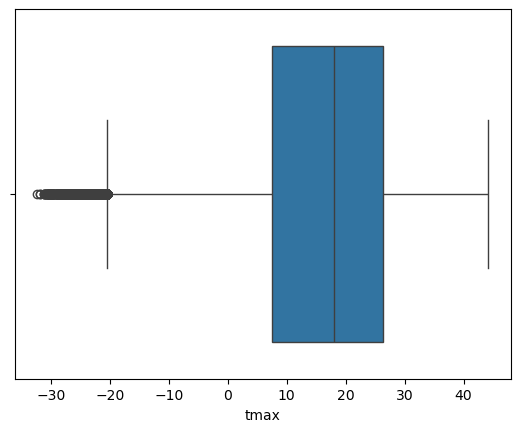

In [441]:
sns.boxplot(hist_wx_df['tmax'], orient='h')

c:\ProgramData\anaconda3\envs\env_master\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  from_comp_data=True,


<Axes: xlabel='tmin'>

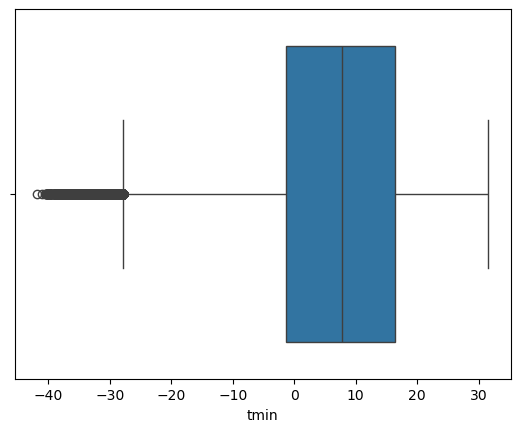

In [442]:
sns.boxplot(hist_wx_df['tmin'], orient='h')

The box plot you show clearly highlights a common problem in precipitation data:
the presence of very high outliers and a strongly asymmetrical (skewed) distribution because probabily there a lot of days without rain.

c:\ProgramData\anaconda3\envs\env_master\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  from_comp_data=True,


<Axes: xlabel='precip'>

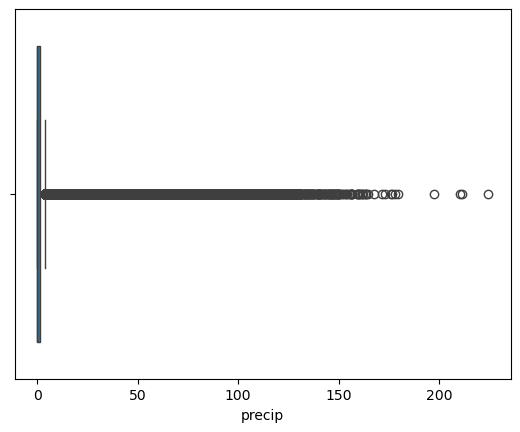

In [443]:
sns.boxplot(hist_wx_df['precip'], orient='h')

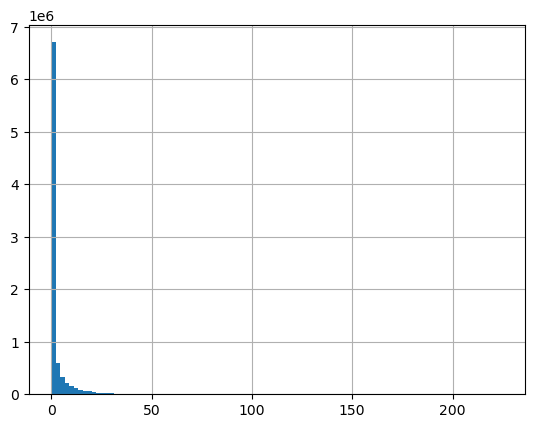

In [444]:
hist_wx_df['precip'].hist(bins=100)
plt.show()

In [445]:
hist_wx_df['rain_flag'] = pd.cut(
    hist_wx_df['precip'],
    bins=[-0.1, 0, 50, float('inf')],
    labels=[0, 1, 2],
    right=True
).astype(int)

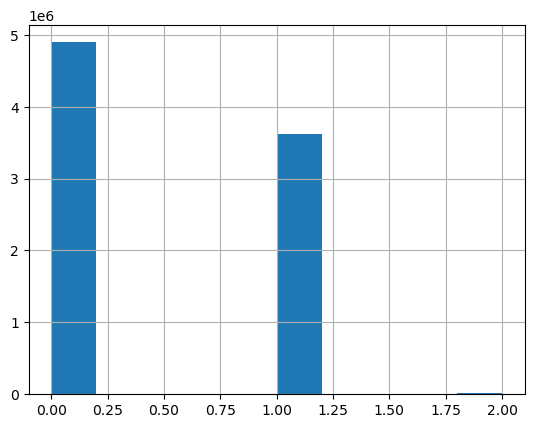

In [446]:
hist_wx_df['rain_flag'].hist()
plt.show()

In [664]:
ts = year_mean.set_index('year')

In [665]:
ts_yield = pd.Series(ts['Value'])

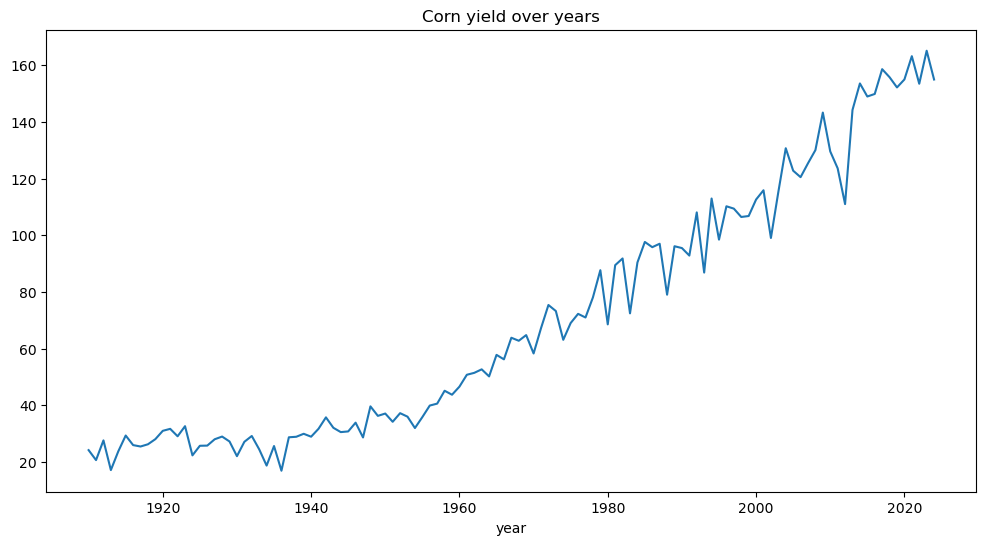

In [666]:
ts_yield.plot(legend=False, title='Corn yield over years', figsize=(12, 6))
plt.show()

In [ ]:
state_means = year_state_mean.groupby('state_name')['Value'].mean()

top_state = state_means.idxmax()
bottom_state = state_means.idxmin()


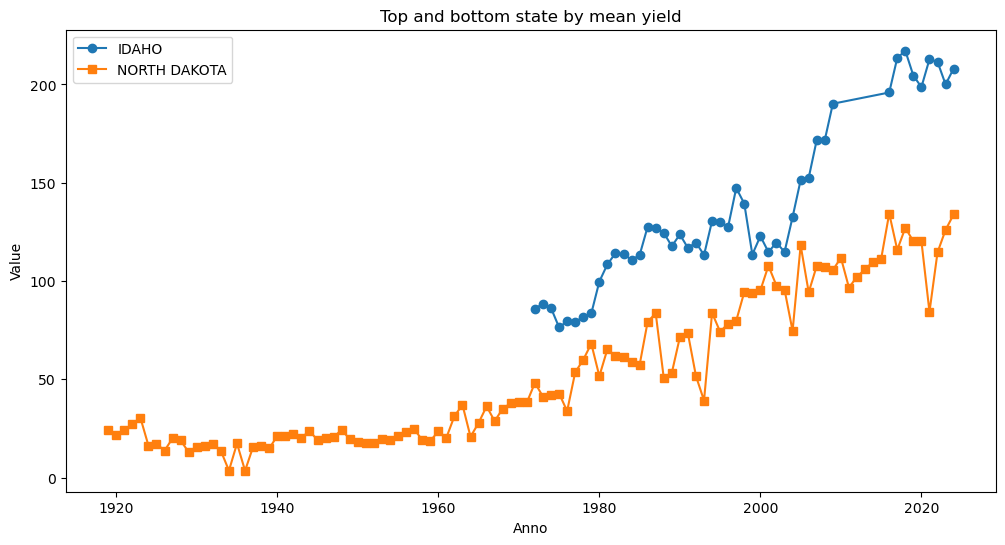

In [671]:
top_data = year_state_mean[year_state_mean['state_name'] == top_state]
bottom_data = year_state_mean[year_state_mean['state_name'] == bottom_state]

plt.figure(figsize=(12, 6))
plt.plot(top_data['year'], top_data['Value'], marker='o', label=top_state)
plt.plot(bottom_data['year'], bottom_data['Value'], marker='s', label=bottom_state)

plt.title("Top and bottom state by mean yield")
plt.xlabel("Anno")
plt.ylabel("Value")
plt.legend()
plt.show()


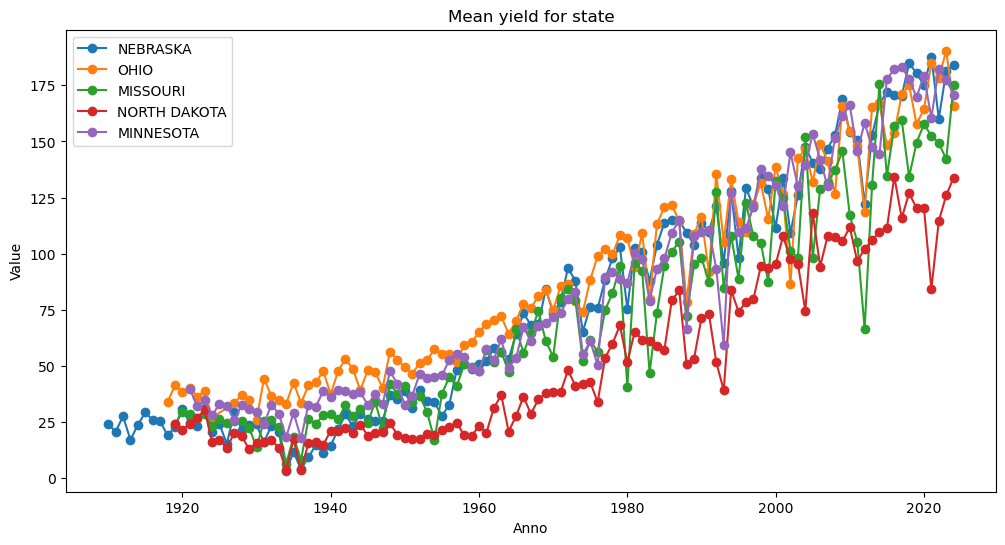

In [669]:
# Graph for the firts 10 states
states_to_plot = year_state_mean['state_name'].unique()[:5]  

plt.figure(figsize=(12, 6))
for state in states_to_plot:
    data = year_state_mean[year_state_mean['state_name'] == state]
    plt.plot(data['year'], data['Value'], marker='o', label=state)

plt.title("Mean yield for state")
plt.xlabel("Anno")
plt.ylabel("Value")
plt.legend()
plt.show()

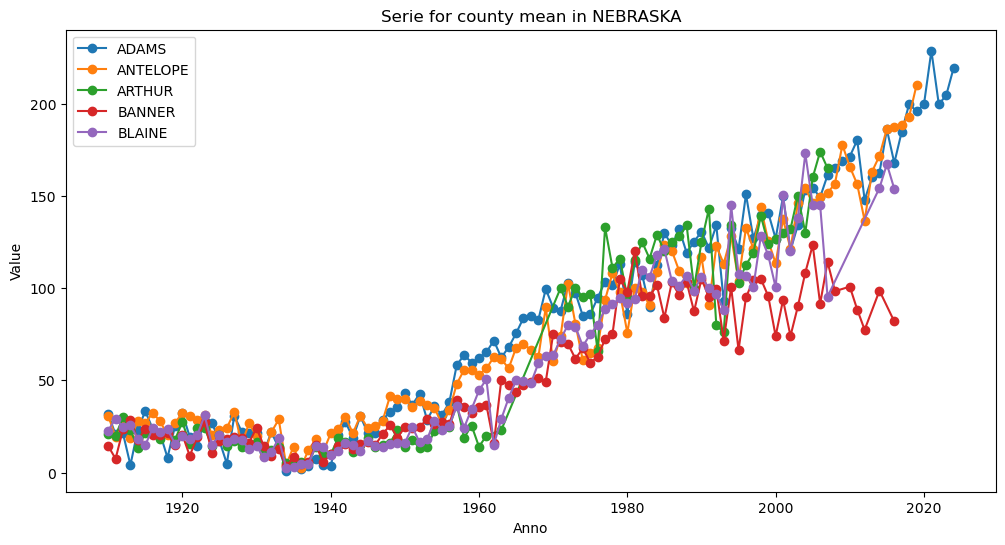

In [670]:
# Serie for county in a specific state
state_example = 'NEBRASKA'
county_time_series = df[df['state_name'] == state_example].groupby(['year', 'county_name'])['Value'].mean().reset_index()

# Selezioniamo alcuni county per il grafico (massimo 5)
counties_to_plot = county_time_series['county_name'].unique()[:5]

plt.figure(figsize=(12, 6))
for county in counties_to_plot:
    data = county_time_series[county_time_series['county_name'] == county]
    plt.plot(data['year'], data['Value'], marker='o', label=county)

plt.title(f"Serie for county mean in {state_example}")
plt.xlabel("Anno")
plt.ylabel("Value")
plt.legend()
plt.show()

## Timeseries

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [672]:
ts = year_mean.set_index('year')
ts_yield = pd.Series(ts['Value'])

In [673]:
ts_yield.isna().sum()

0

In [674]:
ts_yield

year
1910    24.15
1911    20.63
1912    27.59
1913    17.11
1914    23.72
        ...  
2020   155.03
2021   163.25
2022   153.51
2023   165.17
2024   155.01
Name: Value, Length: 115, dtype: float64

In [675]:
type(ts_yield)

pandas.core.series.Series

In [676]:
ts_yield.index

Index([1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
       ...
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype='int64', name='year', length=115)

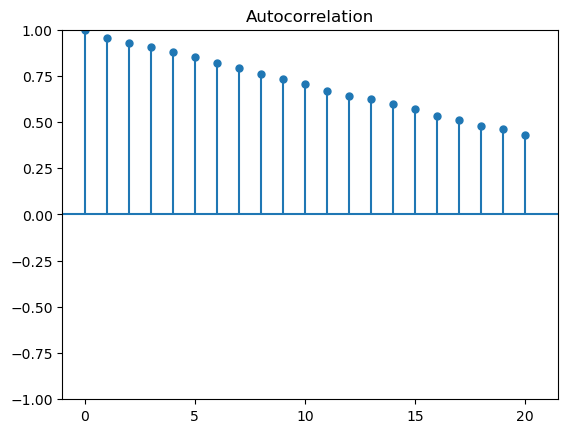

In [677]:
plot_acf(ts_yield.values[11:], lags=20, alpha=1)
plt.show()

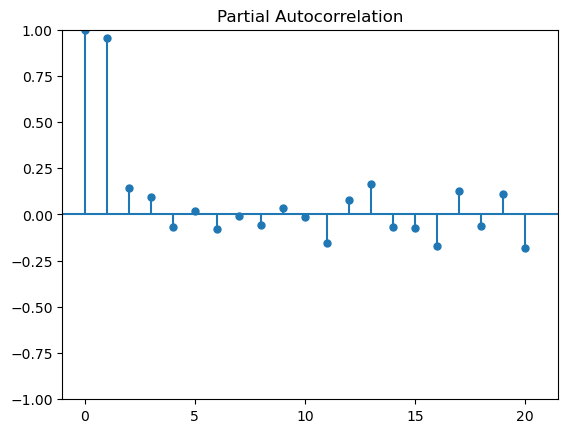

In [678]:
plot_pacf(ts_yield.values[11:], lags=20, alpha=1)
plt.show()

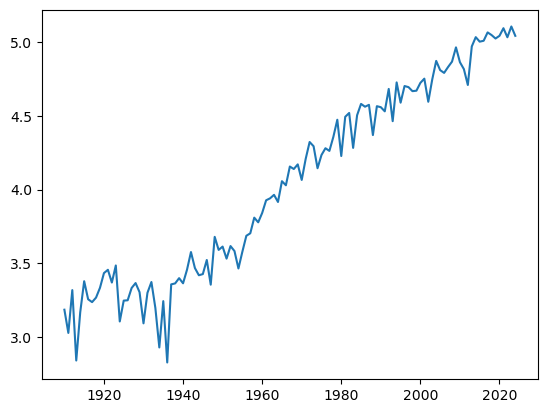

In [679]:
ts_log = pd.Series(np.log(ts_yield))
plt.plot(ts_log)
plt.show()

<Axes: xlabel='year'>

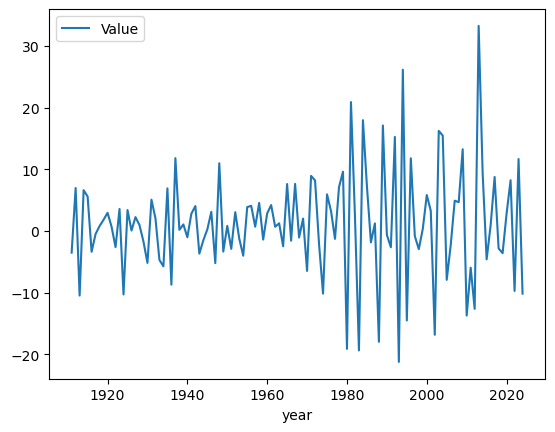

In [680]:
trend = ts.diff() 
trend.plot()


## Weather events

In [748]:
# Ensure datetime format
hist_wx_df['date'] = pd.to_datetime(hist_wx_df['date'])
hist_wx_df['year'] = hist_wx_df['date'].dt.year
hist_wx_df['month'] = hist_wx_df['date'].dt.month

# Filter for growing season (April to October)
growing_season_df = hist_wx_df[hist_wx_df['month'].between(4, 10)]

# Aggregate weather by year
year_weather_summary = growing_season_df.groupby(
    ['year'], 
).agg(
    tmax_mean=('tmax', 'mean'),
    tmin_mean=('tmin', 'mean'),
    precip_sum=('precip', 'sum'),
    swvl1_mean=('swvl1', 'mean'),
    swvl2_mean=('swvl2', 'mean')
    
).reset_index()

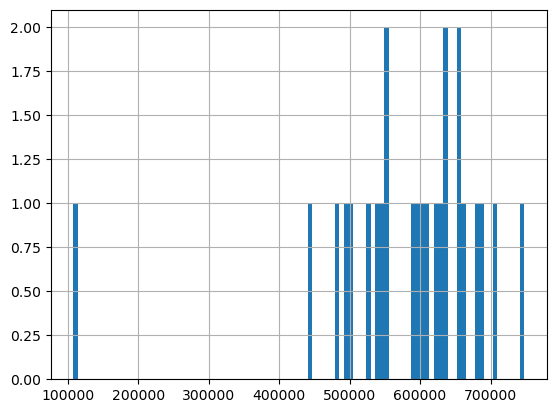

In [749]:
year_weather_summary['precip_sum'].hist(bins=100)
plt.show()

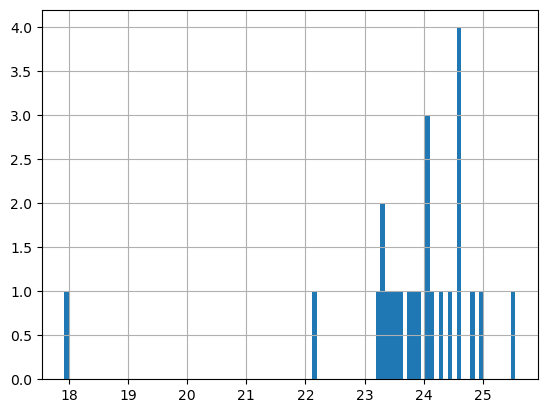

In [750]:
year_weather_summary['tmax_mean'].hist(bins=100)
plt.show()

In [751]:
year_weather_summary['soil_moisture_delta'] = year_weather_summary['swvl1_mean'] - year_weather_summary['swvl2_mean']
year_weather_summary['term_stress'] = year_weather_summary['tmax_mean'] - year_weather_summary['tmin_mean']
year_weather_summary['dry_heat_index'] = (year_weather_summary['tmax_mean']) / (year_weather_summary['precip_sum'] + 1) # adding one to avoid zero div 

In [752]:
year_weather_summary = year_weather_summary[:-1] # Removing 2024 since the data is not complete

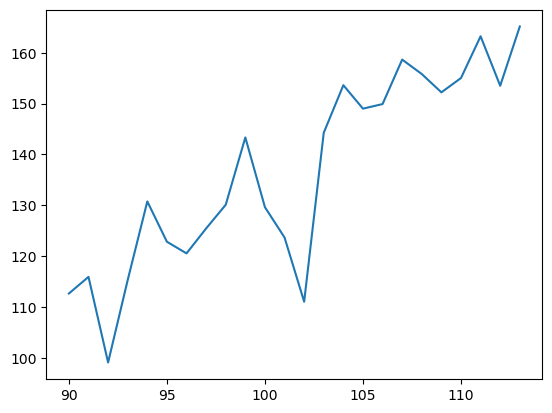

In [753]:
year_mean[(year_mean['year'] >= 2000) & (year_mean['year'] <= 2023)]['Value'].plot()
plt.show()

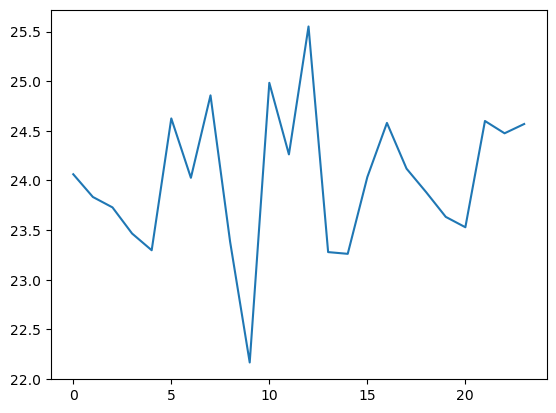

In [754]:
year_weather_summary['tmax_mean'].plot()
plt.show()

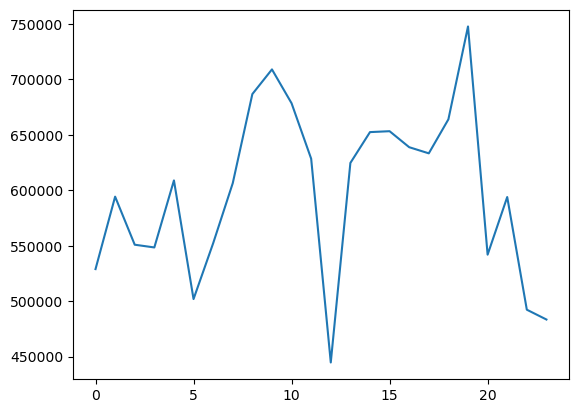

In [755]:
year_weather_summary['precip_sum'].plot()
plt.show()

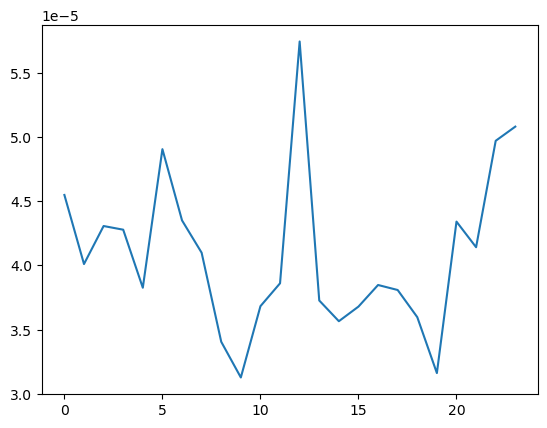

In [756]:
year_weather_summary['dry_heat_index'].plot()
plt.show()

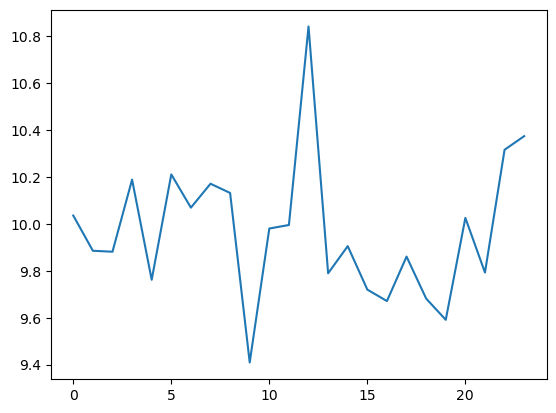

In [757]:
year_weather_summary['term_stress'].plot()
plt.show()

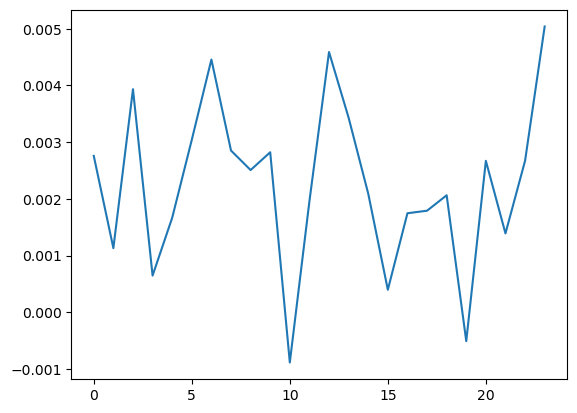

In [758]:
year_weather_summary['soil_moisture_delta'].plot()
plt.show()

By closely analysing the weather data and yield for the period 2000-2023 (range provided for weather data), several things can be noted: <br>
- A sharp decrease in yield around 2012;<br>
- The decrease in yield coincides with a drastic drop in total rainfall; <br>
- Predictably, in addition to the decrease in rainfall, soil moisture also decreased. <br>
- During the same period, it can be observed that the average maximum temperatures were the highest (drought). <br>
- Average maximum temperatures around 25 degrees, combined with good rainfall/soil moisture, allowed for the best yields. <br>

In [759]:
# Aggregate weather by year
weather_summary = growing_season_df.groupby(
    ['year','adm1_name'] 
).agg(
    tmax_mean=('tmax', 'mean'),
    tmin_mean=('tmin', 'mean'),
    precip_sum=('precip', 'sum'),
    swvl1_mean=('swvl1', 'mean'),
    swvl2_mean=('swvl2', 'mean')
    
).reset_index()

In [760]:
weather_summary

,year,adm1_name,tmax_mean,tmin_mean,precip_sum,swvl1_mean,swvl2_mean
0,2000,Illinois,24.60,15.02,"65,535.67",0.34,0.34
1,2000,Indiana,23.36,13.95,"60,648.90",0.34,0.34
2,2000,Iowa,23.72,13.57,"53,146.95",0.29,0.28
3,2000,Kansas,27.66,16.33,"44,858.69",0.24,0.23
4,2000,Kentucky,25.98,16.30,"30,221.32",0.36,0.36
...,...,...,...,...,...,...,...
320,2024,Nebraska,18.05,5.80,"6,969.78",0.30,0.30
321,2024,Ohio,17.88,8.07,"9,104.18",0.37,0.38
322,2024,South Dakota,15.05,3.71,"6,364.38",0.36,0.35
323,2024,Tennessee,21.73,12.64,"3,716.88",0.40,0.41


In [761]:
weather_summary.sort_values("tmax_mean", ascending=False).head(5)

,year,adm1_name,tmax_mean,tmin_mean,precip_sum,swvl1_mean,swvl2_mean
141,2010,Tennessee,28.88,18.73,"23,181.80",0.32,0.32
159,2012,Kansas,28.79,16.79,"36,150.98",0.21,0.21
102,2007,Tennessee,28.62,18.29,"17,649.54",0.30,0.30
146,2011,Kansas,28.46,16.42,"44,025.32",0.21,0.21
289,2022,Kansas,28.41,16.36,"42,373.69",0.22,0.22


In [762]:
weather_summary.sort_values("precip_sum", ascending=False).head(5)

,year,adm1_name,tmax_mean,tmin_mean,precip_sum,swvl1_mean,swvl2_mean
117,2009,Illinois,22.86,13.99,"92,829.77",0.36,0.36
132,2010,Iowa,23.80,14.18,"92,020.65",0.34,0.34
236,2018,Iowa,23.01,13.26,"85,797.37",0.33,0.33
106,2008,Iowa,22.30,12.36,"85,322.65",0.31,0.31
247,2019,Illinois,24.78,15.49,"83,213.33",0.35,0.35


In [763]:
df['state_name'] = df['state_name'].str.upper()

year_weather_summary['adm1_name'] = weather_summary['adm1_name'].str.upper()

In [764]:
merged_df = df.merge(
    year_weather_summary,
    how='inner',
    left_on=['year', 'state_name'],
    right_on=['year', 'adm1_name']
)


In [769]:
corr = merged_df[['Value', 'tmax_mean', 'tmin_mean', 'precip_sum', 'swvl1_mean', 'swvl2_mean', 'term_stress', 'dry_heat_index', 'soil_moisture_delta' ]].corr()
styled_corr = corr.style.background_gradient(cmap='coolwarm').format(precision=2)
display(styled_corr)


,Value,tmax_mean,tmin_mean,precip_sum,swvl1_mean,swvl2_mean,term_stress,dry_heat_index,soil_moisture_delta
Value,1.00,-0.14,-0.03,0.21,0.20,0.18,-0.29,-0.21,0.07
tmax_mean,-0.14,1.00,0.92,-0.44,-0.60,-0.57,0.46,0.60,0.08
tmin_mean,-0.03,0.92,1.00,-0.19,-0.29,-0.27,0.07,0.35,-0.07
precip_sum,0.21,-0.44,-0.19,1.00,0.81,0.81,-0.67,-0.97,-0.46
swvl1_mean,0.20,-0.60,-0.29,0.81,1.00,1.00,-0.85,-0.88,-0.56
swvl2_mean,0.18,-0.57,-0.27,0.81,1.00,1.00,-0.84,-0.87,-0.62
term_stress,-0.29,0.46,0.07,-0.67,-0.85,-0.84,1.00,0.73,0.37
dry_heat_index,-0.21,0.60,0.35,-0.97,-0.88,-0.87,0.73,1.00,0.45
soil_moisture_delta,0.07,0.08,-0.07,-0.46,-0.56,-0.62,0.37,0.45,1.00


Corn yield shows a positive relationship with water availability (rain and soil moisture) and a negative relationship with high temperatures, especially maximum temperatures.  <br>
This suggests that crops respond well to a temperate and humid climate, while excessive heat can penalise them, a classic effect of heat stress.

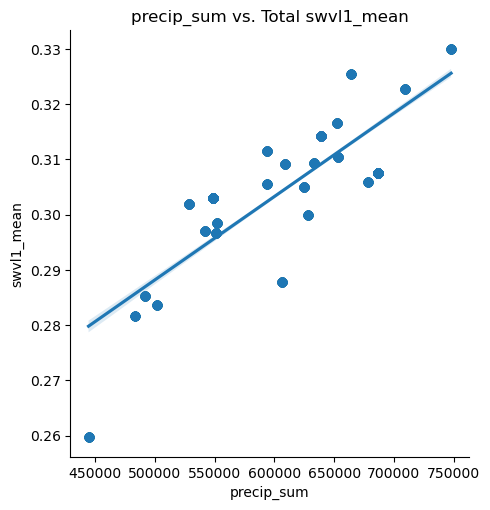

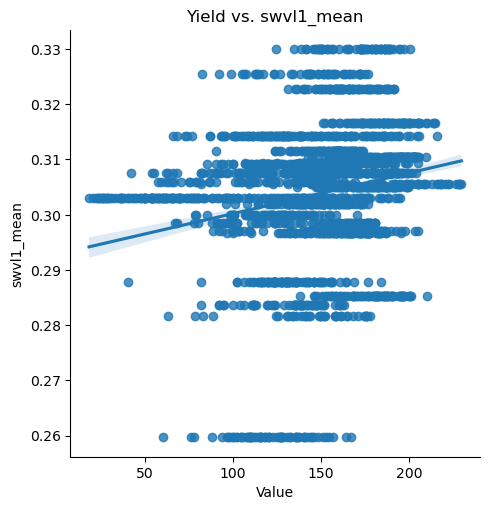

In [770]:
sns.lmplot(data=merged_df, x='precip_sum', y='swvl1_mean')
plt.title('precip_sum vs. Total swvl1_mean')
plt.show()

sns.lmplot(data=merged_df, x='Value', y='swvl1_mean')
plt.title('Yield vs. swvl1_mean')
plt.show()
